<a href="https://colab.research.google.com/github/prajwalDU/Hotel-Booking-analysis/blob/main/Hotel_Booking_Project_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as mtick

import seaborn as sns
sns.set_style("dark")

In [2]:
df = pd.read_csv('../content/Hotel Bookings project.csv')

This data set contains a single file that compares various booking information between two hotels: a city hotel and a resort hotel. This dataset is prepared for various city and resort hotels from Lisbon, Portugal.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Some explanations for unknown terms: Lead time: Timespan between the reservation of a hotel room and checkin

  1.Meal categories: BB (Bed and Breakfast), HB (half board, in which breakfast and dinner are included), FB (full board, in which breakfast, lunch, and dinner are included), SC (self-catering or no meals are included)     
  2.Market Segment: Type of booking (Online/Offline travel Agent (TA), Tour Operators (TO), Direct booking or from a Corporate company for business purposes)                                  
  3.Room types: A, B, C, D, E, F, G, H (Code of room type reserved. Code is 
presented instead of designation for anonymity reasons)           
  4.ADR: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights     
  5.Total special requests: Number of special requests made by the customer (e.g. twin bed or high floor)


**DATA CLEANING AND PREPERATION**

In [7]:
df.isnull().sum().sort_values(ascending=False)[:10]

company                     112593
agent                        16340
country                        488
children                         4
lead_time                        0
arrival_date_year                0
arrival_date_month               0
arrival_date_week_number         0
is_canceled                      0
market_segment                   0
dtype: int64

We have 4 features with missing values
In the company and agent column, we have id_number for each company or agent, so for all the missing values, we will just replace it with 0

In [13]:
df[['agent','company']] = df[['agent','company']].fillna(0.0)

Children column contains the count of children and country columns conatins country codes representing different countries, in both we find there are many missing values, we will just replace it with 0

In [17]:
## for the missing values values in the country column. replace it with mode(value that appears most often)
#df['country'].fillna(data.country.mode().to_string(), inplace=True)

In [19]:
#df['children'].fillna(round(data.children.mean()), inplace=True)

In [20]:
df['country'] = df['country'].fillna(0)
df['children'] = df['children'].fillna(0)

There are many rows that have zero guests including adults,children,babies. These type of row does not make

In [21]:
df[(df.adults+df.babies+df.children)== 0].shape

(180, 32)

we have 180 such rows, we will just remove these rows.

In [22]:
df = df.drop(df[(df.adults+df.babies+df.children)== 0].index)

Lets check datatypes of each column in our dataset.

In [23]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

**Converting Datatype**


We can see different dat types for different columns.
There are some columns like children,company and agent, that are float type but their values are only in integers.
So we will converting them to integer type.

In [26]:
df[['children','company','agent']] = df[['children','company','agent']].astype('int64')

**EXPLORATORY DATA ANALYSIS**

Now let's do the fun part, extract the information from our data and try to answer our questions.

In [27]:
df.shape

(119210, 32)

## Q1 When do the hotels (both city and resort) have the highest footfall?

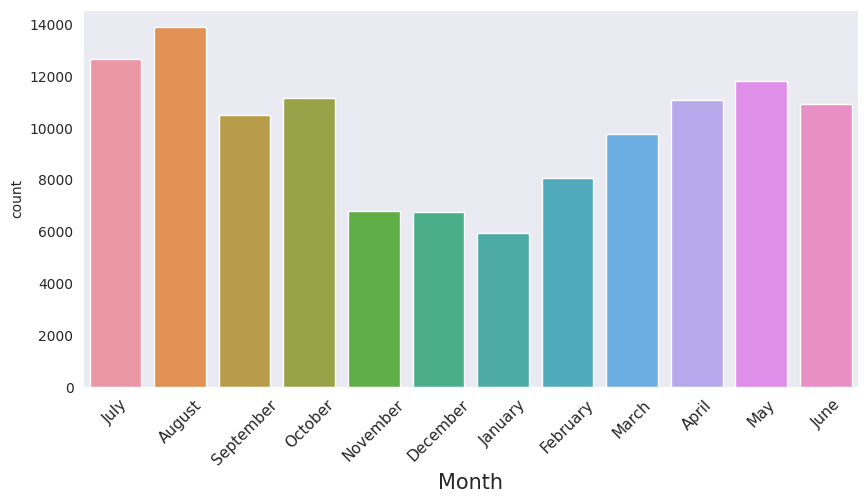

In [28]:
fig = plt.figure(figsize=(10,5), dpi = 100)
sns.countplot(data=df, x = 'arrival_date_month')
plt.xlabel('Month', fontsize=15)
plt.xticks(rotation=45, fontsize=11);

**The above plot shows that August was the busiest month and January was the least (Probably because of the Holiday season in Summer in August and Heavy Winter in January) The high footfall in Jan is followed by July and May.**

## Q2 Which are the top 3 nations from which travelers and tourists visit the hotels in Portugal.

In [29]:
df['country'].value_counts()

PRT    48483
GBR    12120
FRA    10401
ESP     8560
DEU     7285
       ...  
BDI        1
MDG        1
SLE        1
DJI        1
UMI        1
Name: country, Length: 178, dtype: int64

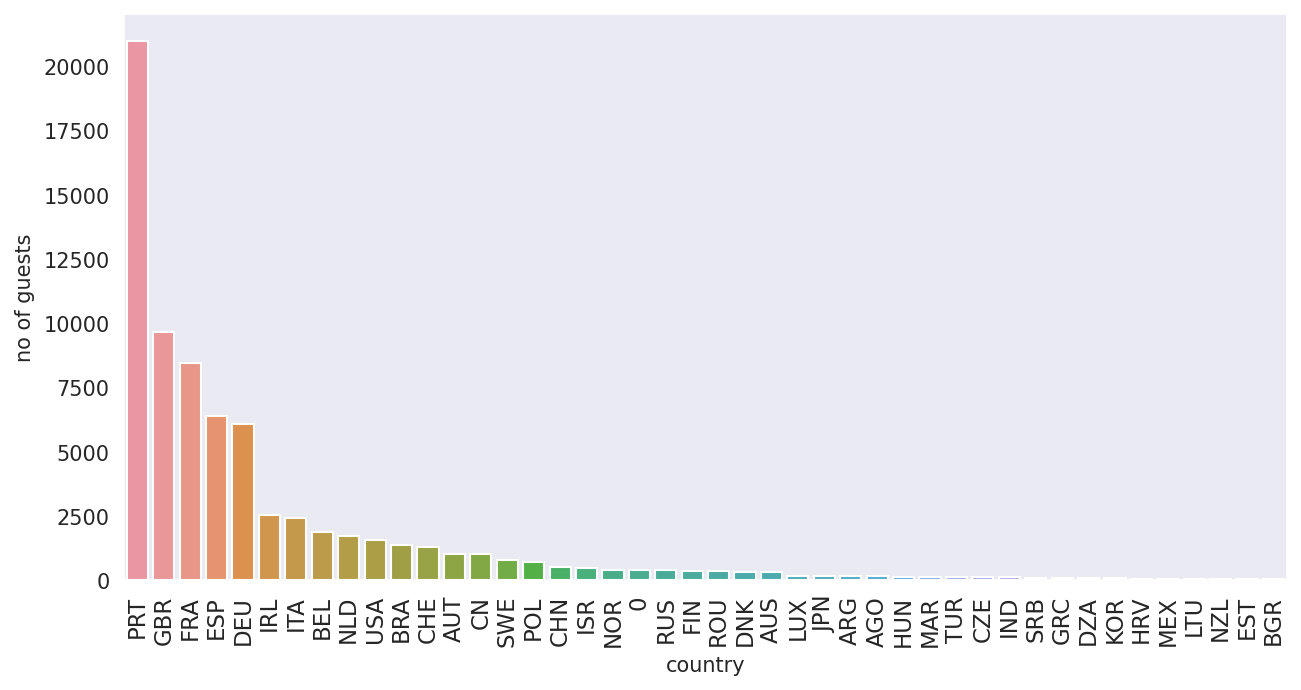

In [31]:
fig = plt.figure(figsize=(10,5), dpi=150)
country_wise_guests = df[(df['is_canceled'] == 0)]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country','no of guests']

country_wise_guests = country_wise_guests[country_wise_guests['no of guests'] > 60]
sns.barplot(data=country_wise_guests, x='country', y='no of guests')
plt.xticks(rotation=90, fontsize=11);

**Most of the guests are from Portugal which is reasonable because both hotels are in PRT Since there were 156 countries, I picked up ones with more than 60 guests so we can have a clear plot. Next in line for the highest number of guests are Great Britain, France, Spain, Germany, and Ireland respectively.**

### Q3 What type of Bookings is majorly seen in the hotels?

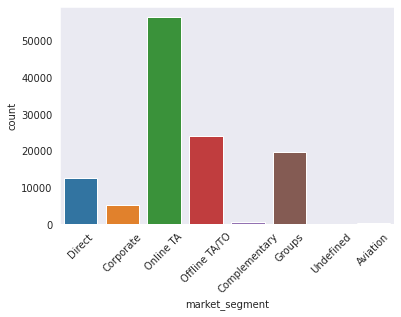

In [32]:
sns.countplot(data=df, x='market_segment')
plt.xticks(rotation=45,fontsize=10);

**We all know in the current world, people’s use of technology is massively increased and we can see in the above plot that almost 50 percent of reservations are applied via Online Travel Agents. Offline TA/TO comes next which displays the considerably good contribution of the employment in the Travel and Tourism sector.**

### Q4 How Many Bookings Were Cancelled?

In [39]:
def get_count(series, limit=None):
  '''
  INPUT :
    series: Pandas Series (Single column from DataFrame)
    limit:  If value given, limit the output value to first limit samples.
  OUTPUT :
    x = Unique values
    y = Count of unique values
  '''

  if limit != None:
    series = series.value_counts()[:limit]
  else:
    series = series.value_counts()

  x = series.index
  y = series/series.sum()*100

  return x.values,y.values

This function takes a series or data frame column and return the two arrays

x is our unique values             
y is the percentage values of each unique          

now let's use this function on our **is_canceled** feature and see the result


In [40]:
x,y = get_count(df['is_canceled'])

In [41]:
x,y

(array([0, 1]), array([62.92341247, 37.07658753]))

 **is_canceled** have two unique values: 1 if booikn got canceled, else 0.

Now let's plot this result. I will write another fuunction to plot the diagram. The good thing about writing function is that we can reuse the code again and again.

In [ ]:
def plot(x, y, x_label=None, y_label=None, title=None, figsize=(7,5), type='bar'):

  '''
  INPUT :    
    x:       Array containing values for x_axis
    y:       Array containing values for y_axis
    x_label: string value for x_axis label
    y_label: string value for x_axis label
    title:   string values for plot title
    figsize: tuple value, for figure size
    type:    type of plot (default is bar plot)

  OUTPUT :
    Display the plot

  '''

  fig, ax = plt.subplots(figsize=figsize)
  ax.